In [2]:
import pandas as pd

# CSV 파일 읽기
df_solar = pd.read_csv('df_merged_solar_final.csv')

In [3]:
# 데이터 요약
print("✅ 데이터 기본 정보")
print(df_solar.info())

# 결측치 확인
print("\n✅ 컬럼별 결측치 수")
print(df_solar.isnull().sum())

# 기본 통계
print("\n✅ 수치형 컬럼 기술 통계")
print(df_solar.describe())


✅ 데이터 기본 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196890 entries, 0 to 196889
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   일자         196890 non-null  object 
 1   발전구분       196890 non-null  object 
 2   설비용량(MW)   196890 non-null  float64
 3   시간         196890 non-null  int64  
 4   발전량(kWh)   196827 non-null  float64
 5   연식(년)      196890 non-null  float64
 6   지점명        196890 non-null  object 
 7   기온(°C)     196867 non-null  float64
 8   강수량(mm)    196889 non-null  float64
 9   풍속(m/s)    196856 non-null  float64
 10  풍향(16방위)   196856 non-null  float64
 11  습도(%)      196845 non-null  float64
 12  일사(MJ/m2)  196889 non-null  float64
 13  적설(cm)     196889 non-null  float64
 14  하늘상태       187736 non-null  float64
 15  태양고도       196890 non-null  float64
 16  방위각        99467 non-null   float64
dtypes: float64(13), int64(1), object(3)
memory usage: 25.5+ MB
None

✅ 컬럼별 결측치 수
일자              

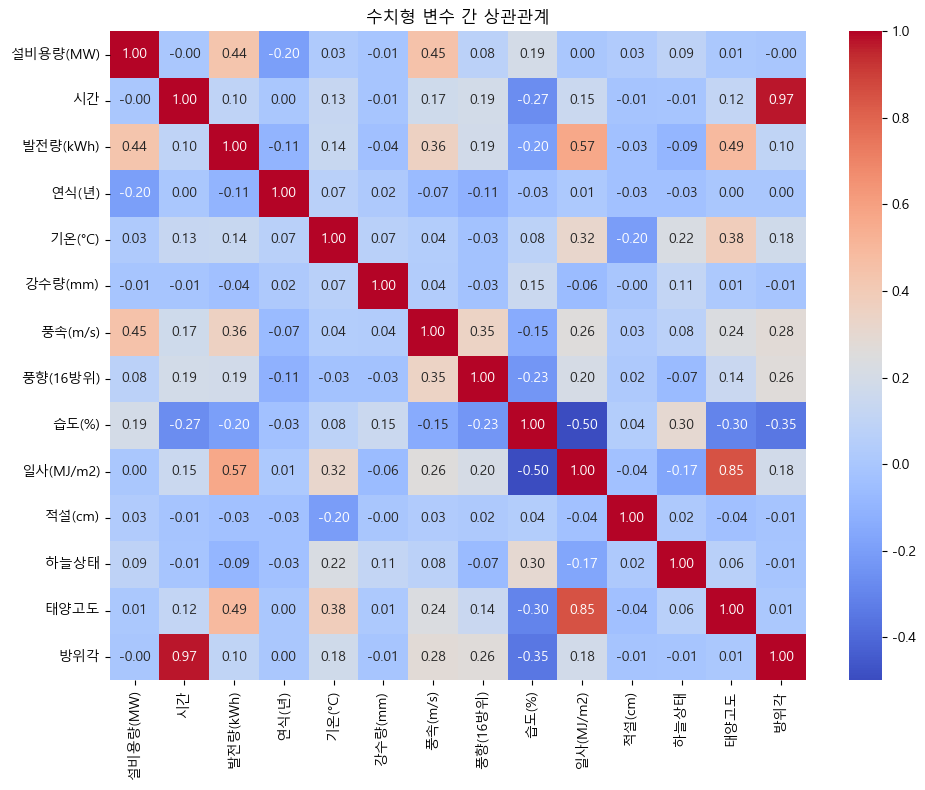

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import platform

# ✅ 한글 폰트 설정 (운영체제별 자동 감지)
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')  # 윈도우용
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')    # 맥용
else:
    plt.rc('font', family='NanumGothic')    # 리눅스용 (NanumGothic 설치 필요)

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

plt.figure(figsize=(10, 8))
sns.heatmap(df_solar.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('수치형 변수 간 상관관계')
plt.tight_layout()
plt.savefig("df_solar_상관관계_히트맵.png", dpi=300)  # 🔽 저장
plt.show()


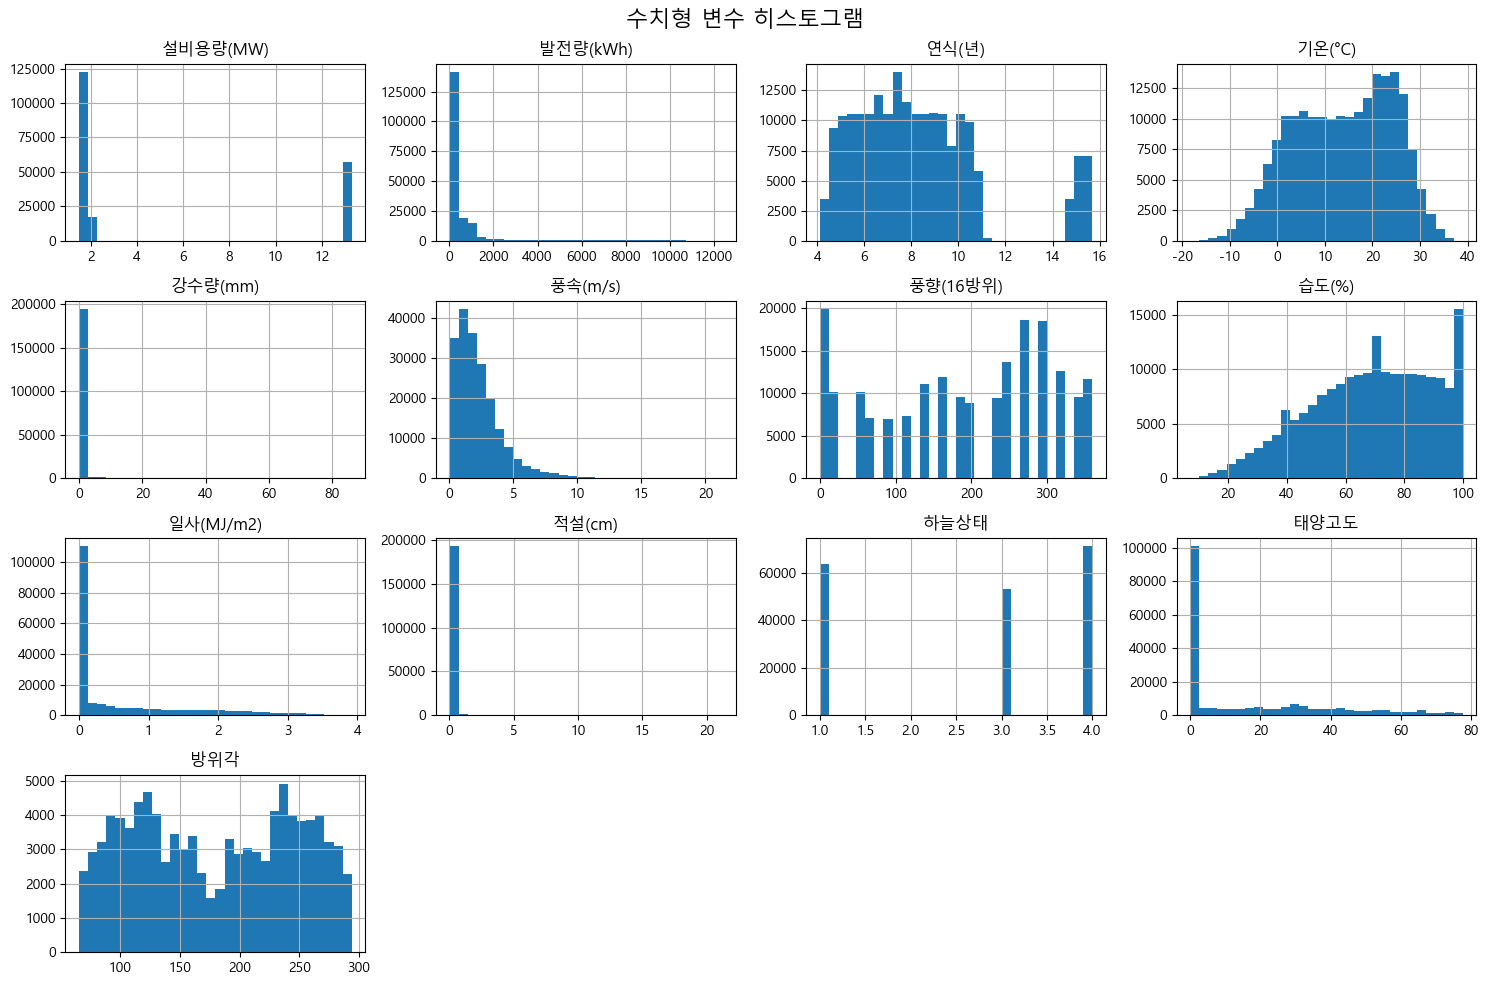

In [21]:
import matplotlib.pyplot as plt

# 1. 수치형 컬럼 자동 탐색
num_cols = df_solar.select_dtypes(include=['float64', 'int64']).columns

# 2. 히스토그램 그리고 figure 저장
fig = df_solar[num_cols].hist(bins=30, figsize=(15, 10))  # ← fig는 Axes 객체 배열
plt.suptitle("수치형 변수 히스토그램", fontsize=16)
plt.tight_layout()
plt.savefig("df_solar_히스토그램.png", dpi=300)
plt.show()


In [18]:
def summarize_unique_values_full(df, threshold=50):
    print("✅ 컬럼별 유니크 값 및 개수 요약\n")
    
    for col in df.columns:
        unique_vals = df[col].dropna().unique()
        nunique = len(unique_vals)
        
        print(f"\n🔹 {col} ({df[col].dtype}) → 고유값 {nunique}개")

        if nunique > threshold:
            print("   ⮑ 연속형 데이터로 판단됨 (고유값 50개 초과)\n")
        else:
            value_counts = df[col].value_counts(dropna=True)
            for val, count in value_counts.items():
                print(f"   • {val} : {count}개")

# 실행
summarize_unique_values_full(df_solar)


✅ 컬럼별 유니크 값 및 개수 요약


🔹 일자 (datetime64[ns]) → 고유값 2557개
   ⮑ 연속형 데이터로 판단됨 (고유값 50개 초과)


🔹 발전구분 (object) → 고유값 5개
   • 영암에프원태양광b : 56934개
   • 안산연성정수장태양광 : 56886개
   • 세종시폐기물매립장태양광 : 56814개
   • (군산)삼랑진태양광 : 17520개
   • 태안#9,10 수상태양광 : 8736개

🔹 설비용량(MW) (float64) → 고유값 5개
   • 13.296 : 56934개
   • 1.49 : 56886개
   • 1.628 : 56814개
   • 2.0 : 17520개
   • 1.836 : 8736개

🔹 시간 (int32) → 고유값 24개
   • 0 : 8221개
   • 2 : 8203개
   • 23 : 8203개
   • 22 : 8203개
   • 21 : 8203개
   • 20 : 8203개
   • 19 : 8203개
   • 18 : 8203개
   • 17 : 8203개
   • 16 : 8203개
   • 15 : 8203개
   • 14 : 8203개
   • 1 : 8203개
   • 12 : 8203개
   • 11 : 8203개
   • 10 : 8203개
   • 9 : 8203개
   • 8 : 8203개
   • 7 : 8203개
   • 6 : 8203개
   • 5 : 8203개
   • 4 : 8203개
   • 3 : 8203개
   • 13 : 8203개

🔹 발전량(kWh) (float64) → 고유값 16997개
   ⮑ 연속형 데이터로 판단됨 (고유값 50개 초과)


🔹 연식(년) (float64) → 고유값 81개
   ⮑ 연속형 데이터로 판단됨 (고유값 50개 초과)


🔹 지점명 (object) → 고유값 5개
   • 목포 : 56934개
   • 수원 : 56886개
   • 청주 : 56814개
   • 양산시 : 17520개
   • 서산 : 